<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_6sem/blob/main/3)%D0%9D%D0%B5%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BF%D0%BB%D0%BE%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation, PillowWriter

In [42]:
n, k, m = 1, -1/3, -1/3
hi = 1
u_0 = 1.25
a0, b0, a1, b1 = 0, 1, 0, 1

h_ = 0.01
tau_ = 0.01
xmin = 0
xmax = 5

alpha = lambda n: math.sqrt(2*(n+2)/n)
f = lambda x: n/(2*(n+2)) * ((alpha(n))**2 - x**2)
gamma = lambda t: u_0 * t**k
lmbd = lambda uu: uu**n

def u(x,t):
    if (x >= 0) and (x < alpha(n) * math.sqrt(hi * u_0**n * t** (k*n+1))):
        return u_0 * t**k * (f(x / math.sqrt((hi * u_0**n * t**(k*n+1))))) **(1/n)
    else:
        return 0

Прогонка

In [43]:
def Progonka(a, b, c, f):
#-------------------Прямой ход-------------------------------
    LENGTH = len(a) - 1

    A = np.zeros(len(a))
    B = np.zeros(len(a))

    A[0] = -c[0] / b[0]
    B[0] = f[0] / b[0]

    for i in range(1, LENGTH):
        A[i] = -c[i] / (b[i] + a[i]*A[i-1])
    for i in range(1, LENGTH):
        B[i] = (f[i] - a[i]*B[i-1]) / (b[i] + a[i]*A[i-1])

    A[-1] = 0
    B[-1] = (f[-1] - a[-1]*B[-2]) / (b[-1] + a[-1]*A[-2])

#-------------------Обратный ход-----------------------------
    y = np.zeros(len(a))
    y[-1] = B[-1]
    for i in range(LENGTH - 1, -1, -1):
        y[i] = B[i] + A[i]*y[i+1]

    return y 

In [44]:
def next_line_1(prev, next, tau, step, xk, h):
    a = np.zeros(len(xk))
    b = np.zeros(len(xk))
    c = np.zeros(len(xk))
    d = np.zeros(len(xk))

    d[0] = gamma(step*tau)
    d[-1] = u(xk[-1],tau*step)

    b[0] = -(a0/h) + b0
    c[0] = a0/h

    b[-1] = (a1 / h) + b1
    a[-1] = -a1/h

    for i in range(1, len(xk)-1):
        a[i] = tau/(2*h**2) * (lmbd(next[i]) + lmbd(next[i - 1]))
        b[i] = - tau/(2*h**2) * (2*lmbd(next[i]) + lmbd(next[i - 1]) + lmbd(next[i + 1])) - 1
        c[i] = tau/(2*h**2) * (lmbd(next[i]) + lmbd(next[i + 1]))
        d[i] = - prev[i]


    return Progonka(a,b,c,d) 

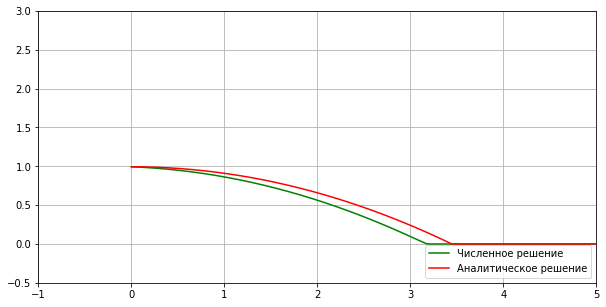

In [45]:
x_range = np.arange(xmin, xmax + h_, h_)
fig = plt.figure(figsize=(10,5))
u2 = np.zeros((2, len(x_range)))

ax = plt.axes(xlim=(xmin-1, xmax), ylim=(-0.5, 3))
ax.grid(True)
line1, = ax.plot([], [], label="Численное решение", color = 'green' )
line2, = ax.plot([], [],  label="Аналитическое решение", color = 'red')
line1.set_data([], [])
line2.set_data([], [])
ax.legend(loc='lower right')

def animate(i):
    yreal = np.zeros(len(x_range))
    if (i == 0 or i == 1):
        y = u2[i]
        for j in range(len(x_range)):
            yreal[j] = u(x_range[j], i * tau_)
    else:
        u2[0] = np.copy(u2[1])
        for j in range(50):
            u2[1] = next_line_1(u2[0], u2[1], tau_, i, x_range, h_)
        y = u2[1]
        for j in range(len(x_range)):
            yreal[j] = u(x_range[j], i * tau_)

    line1.set_data(x_range, y)
    line2.set_data(x_range, yreal)
    return line2, line1

anim1 = FuncAnimation(fig, animate,
                     frames= 200, interval=100, blit=True)
anim1.save('nteplo.gif',  writer='pillow')